In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [10]:
df = pd.read_csv(r"C:\Users\kalin\Downloads\Pollution_Weather_datset.csv")
print(df.head())

              Country              City  AQI Value AQI Category  CO AQI Value  \
0  Russian Federation        Praskoveya         51     Moderate             1   
1              Brazil  Presidente Dutra         41         Good             1   
2               Italy   Priolo Gargallo         66     Moderate             1   
3              Poland         Przasnysz         34         Good             1   
4              France          Punaauia         22         Good             0   

  CO AQI Category  Ozone AQI Value Ozone AQI Category  NO2 AQI Value  \
0            Good               36               Good              0   
1            Good                5               Good              1   
2            Good               39               Good              2   
3            Good               34               Good              0   
4            Good               22               Good              0   

  NO2 AQI Category  PM2.5 AQI Value PM2.5 AQI Category  Temperature (C)  \
0    

In [4]:
df.shape

(21882, 20)

In [5]:
df.columns

Index(['Country', 'City', 'AQI Value', 'AQI Category', 'CO AQI Value',
       'CO AQI Category', 'Ozone AQI Value', 'Ozone AQI Category',
       'NO2 AQI Value', 'NO2 AQI Category', 'PM2.5 AQI Value',
       'PM2.5 AQI Category', 'Temperature (C)', 'Humidity (%)',
       'Wind Speed (m/s)', 'Wind Direction (deg)', 'Latitude', 'Longitude',
       'Timestamp', 'Source_API'],
      dtype='object')

In [6]:
len(df.columns)


20

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21882 entries, 0 to 21881
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Country               21882 non-null  object 
 1   City                  21882 non-null  object 
 2   AQI Value             21882 non-null  int64  
 3   AQI Category          21882 non-null  object 
 4   CO AQI Value          21882 non-null  int64  
 5   CO AQI Category       21882 non-null  object 
 6   Ozone AQI Value       21882 non-null  int64  
 7   Ozone AQI Category    21882 non-null  object 
 8   NO2 AQI Value         21882 non-null  int64  
 9   NO2 AQI Category      21882 non-null  object 
 10  PM2.5 AQI Value       21882 non-null  int64  
 11  PM2.5 AQI Category    21882 non-null  object 
 12  Temperature (C)       21882 non-null  float64
 13  Humidity (%)          21882 non-null  float64
 14  Wind Speed (m/s)      21882 non-null  float64
 15  Wind Direction (deg

In [8]:
df.describe()

,AQI Value,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value,Temperature (C),Humidity (%),Wind Speed (m/s),Wind Direction (deg),Latitude,Longitude,Timestamp
count,21882.000000,21882.000000,21882.000000,21882.000000,21882.000000,21882.000000,21882.000000,21882.000000,21882.000000,21882.000000,21882.000000,2.188200e+04
mean,72.294534,1.377799,35.086235,3.112650,68.826753,13.136929,72.653322,2.487550,176.972032,28.124344,12.169295,1.764698e+09
std,56.718782,1.837905,28.237732,5.322278,55.395414,11.349976,20.435993,1.656738,105.671546,23.299904,69.169200,9.227899e+03
min,6.000000,0.000000,0.000000,0.000000,0.000000,-37.840000,1.000000,0.000000,0.000000,-54.800000,-159.775000,1.764689e+09
25%,39.000000,1.000000,21.000000,0.000000,35.000000,4.950000,61.000000,1.230000,86.000000,14.523900,-46.347400,1.764690e+09
50%,55.000000,1.000000,30.000000,1.000000,54.000000,11.395000,79.000000,2.100000,180.000000,35.233350,12.787450,1.764690e+09
75%,80.000000,1.000000,40.000000,4.000000,79.000000,23.087500,88.000000,3.490000,267.000000,46.087075,72.864650,1.764709e+09
max,500.000000,133.000000,235.000000,91.000000,500.000000,39.500000,100.000000,22.800000,360.000000,69.649600,178.416700,1.764709e+09


In [9]:
df.isnull().sum()

Country                 0
City                    0
AQI Value               0
AQI Category            0
CO AQI Value            0
CO AQI Category         0
Ozone AQI Value         0
Ozone AQI Category      0
NO2 AQI Value           0
NO2 AQI Category        0
PM2.5 AQI Value         0
PM2.5 AQI Category      0
Temperature (C)         0
Humidity (%)            0
Wind Speed (m/s)        0
Wind Direction (deg)    0
Latitude                0
Longitude               0
Timestamp               0
Source_API              0
dtype: int64

In [12]:
df['Timestamp'].head()

0    1.764709e+09
1    1.764709e+09
2    1.764709e+09
3    1.764709e+09
4    1.764709e+09
Name: Timestamp, dtype: float64

In [16]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'],unit='s')
df['Timestamp'].head()

0   2025-12-02 20:50:41
1   2025-12-02 20:50:41
2   2025-12-02 20:50:41
3   2025-12-02 20:50:41
4   2025-12-02 20:50:41
Name: Timestamp, dtype: datetime64[ns]

In [22]:
df['hour'] = df['Timestamp'].dt.hour
df['day'] = df['Timestamp'].dt.dayofweek
df['month'] = df['Timestamp'].dt.month


In [23]:
df[['Timestamp', 'hour', 'day', 'month']].head()

,Timestamp,hour,day,month
0,2025-12-02 20:50:41,20,1,12
1,2025-12-02 20:50:41,20,1,12
2,2025-12-02 20:50:41,20,1,12
3,2025-12-02 20:50:41,20,1,12
4,2025-12-02 20:50:41,20,1,12


In [24]:
df.describe()

,AQI Value,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value,Temperature (C),Humidity (%),Wind Speed (m/s),Wind Direction (deg),Latitude,Longitude,Timestamp,hour,weekday,month,day
count,21882.000000,21882.000000,21882.000000,21882.000000,21882.000000,21882.000000,21882.000000,21882.000000,21882.000000,21882.000000,21882.000000,21882,21882.000000,21882.0,21882.0,21882.0
mean,72.294534,1.377799,35.086235,3.112650,68.826753,13.136929,72.653322,2.487550,176.972032,28.124344,12.169295,2025-12-02 17:55:21.927109376,17.158395,1.0,12.0,1.0
min,6.000000,0.000000,0.000000,0.000000,0.000000,-37.840000,1.000000,0.000000,0.000000,-54.800000,-159.775000,2025-12-02 15:24:25,15.000000,1.0,12.0,1.0
25%,39.000000,1.000000,21.000000,0.000000,35.000000,4.950000,61.000000,1.230000,86.000000,14.523900,-46.347400,2025-12-02 15:40:56,15.000000,1.0,12.0,1.0
50%,55.000000,1.000000,30.000000,1.000000,54.000000,11.395000,79.000000,2.100000,180.000000,35.233350,12.787450,2025-12-02 15:44:12,15.000000,1.0,12.0,1.0
75%,80.000000,1.000000,40.000000,4.000000,79.000000,23.087500,88.000000,3.490000,267.000000,46.087075,72.864650,2025-12-02 20:51:41,20.000000,1.0,12.0,1.0
max,500.000000,133.000000,235.000000,91.000000,500.000000,39.500000,100.000000,22.800000,360.000000,69.649600,178.416700,2025-12-02 20:53:11,20.000000,1.0,12.0,1.0
std,56.718782,1.837905,28.237732,5.322278,55.395414,11.349976,20.435993,1.656738,105.671546,23.299904,69.169200,NaN,2.476608,0.0,0.0,0.0


Dataset is already preprocessed. 

## 2.EDA on data


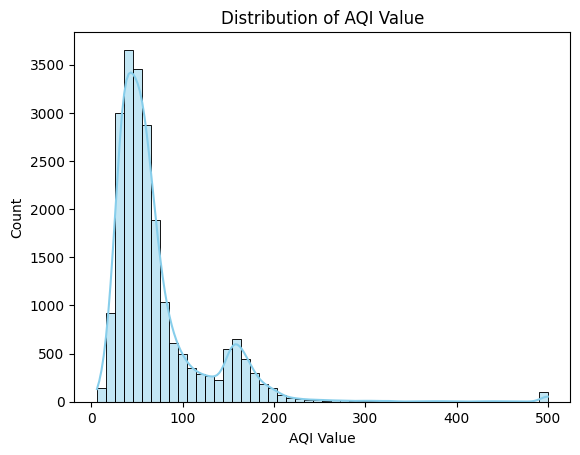

In [27]:
sns.histplot(df['AQI Value'],bins=50,kde=True,color = 'skyblue')
plt.title('Distribution of AQI Value')
plt.show()

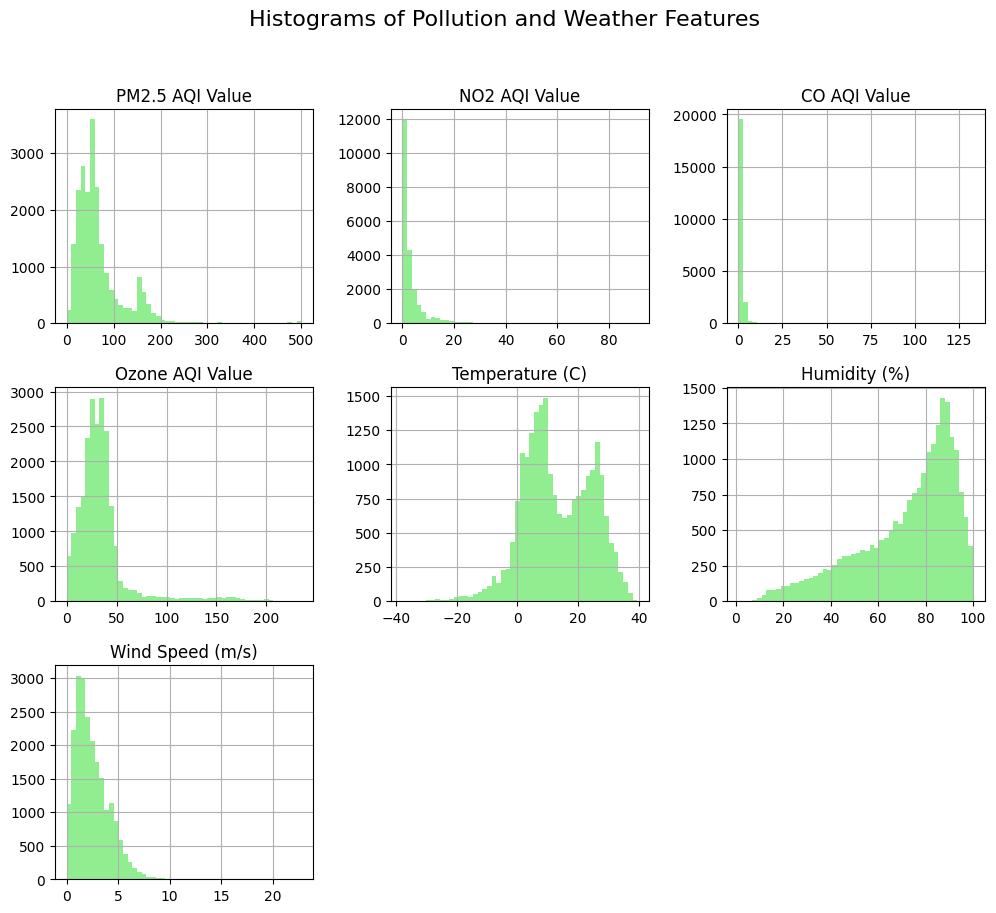

In [31]:
cols = ['PM2.5 AQI Value', 'NO2 AQI Value', 'CO AQI Value', 'Ozone AQI Value',
        'Temperature (C)', 'Humidity (%)', 'Wind Speed (m/s)']

df[cols].hist(figsize=(12,10), bins=50, color='lightgreen')
plt.suptitle("Histograms of Pollution and Weather Features", fontsize=16)
plt.show()


## Outliers


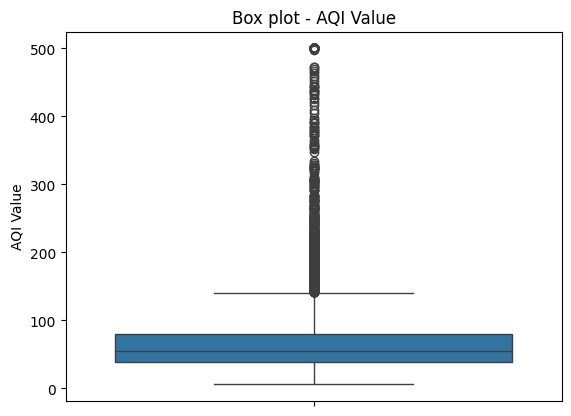

In [34]:
sns.boxplot(y=df['AQI Value'])
plt.title('Box plot - AQI Value')
plt.show()